In [111]:
#IMPORT STATEMENTS
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
#Read the dataset
df=pd.read_csv("/kaggle/input/uncleaned-laptop-price-dataset/laptopData.csv")

In [113]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [114]:
#Removing Unwanted Column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


# **Check for null values**

In [116]:
df.isna().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [117]:
null_rows = df[df.isnull().any(axis=1)]
#print(null_rows)
null_rows.shape

(30, 11)

In [118]:
#DELETE THE ROWS WITH NULL
#All the rows are completely nan, hence this is the only solution
df.dropna(inplace=True)
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# **DATA CLEANING**

# **1) Clean Weights**

In [119]:
def clean(text):
    text=str(text)
    text=re.sub("[^0.0-9.0]","",text)
    return text

In [120]:
#cleaning
df["Weight"]=df["Weight"].apply(clean)

#type casting
df["Weight"]=pd.to_numeric(df["Weight"])

df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


# **2) Ram**

In [121]:
df["Ram"]=df["Ram"].apply(clean)
df["Ram"]=pd.to_numeric(df["Ram"])
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


# **Memory**

In [122]:
df["Memory Size"]=df["Memory"].str.split(" ").str.get(0)
df["Memory Type"]=df["Memory"].str.split(" ").str.get(1)

In [123]:
df["Memory Size"].unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '64GB', '32GB', '2TB',
       '1.0TB', '16GB', '180GB', '?', '240GB', '8GB', '508GB'],
      dtype=object)

In [124]:
#convert TB to GB
def convert(text):
    text=str(text)
    if 'TB' in text:
        text=re.sub("TB","",text)
        num=float(text)
        num=num*1000
        return str(num)
    elif 'GB' in text:
        text=re.sub("GB","",text)
        return text
    else :
        return np.nan

In [125]:
df["Memory Size"]=df["Memory Size"].apply(convert)
df["Memory Size"]=pd.to_numeric(df["Memory Size"])

In [126]:
df["Memory Size"].unique()

array([ 128.,  256.,  512.,  500., 1000.,   64.,   32., 2000.,   16.,
        180.,   nan,  240.,    8.,  508.])

In [127]:
df.drop("Memory",axis=1,inplace=True)
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory Size,Memory Type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128.0,SSD


# **IPS and Touchscreen**

In [128]:
def ips(x):
    x=str(x)
    if "IPS" in x:
        return 1
    else:
        return 0

In [129]:
def touchscreen(x):
    x=str(x)
    if "Touchscreen" in x:
        return 1
    else:
        return 0

In [130]:
df["IPS"] = df["ScreenResolution"].apply(ips)
df["TouchScreen"] = df["ScreenResolution"].apply(touchscreen)
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory Size,Memory Type,IPS,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128.0,SSD,1,0


# **Screen Resolution**

In [131]:
def extract_dimensions(text):
  text=str(text)
  match=re.search('(\d+)x(\d+)',text)
  if match:
     width,height=match.groups()
     width=int(width)
     height=int(height)
     return pd.Series([width, height]) # Return a Series with two elements
  else:
    return pd.Series([None, None]) # Return a Series with two None values

In [132]:
df[["X-Res","Y-Res"]] = df["ScreenResolution"].apply(extract_dimensions)
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory Size,Memory Type,IPS,TouchScreen,X-Res,Y-Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128.0,SSD,1,0,2560,1600


# **Check Multicollinearity**

<Axes: >

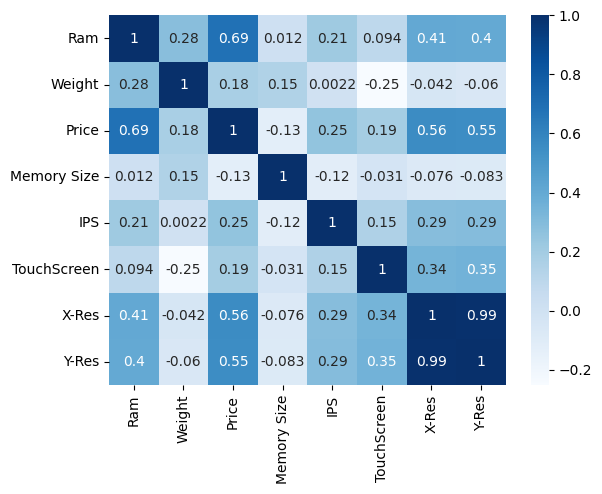

In [133]:
c=df.corr(numeric_only=True)
sns.heatmap(c,annot=True,cmap="Blues")

# **Inches**

In [134]:
#cleaning is required as the data consist of unwanted symbol ?
df["Inches"]=df["Inches"].apply(clean)
df["Inches"]=pd.to_numeric(df["Inches"])
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory Size,Memory Type,IPS,TouchScreen,X-Res,Y-Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128.0,SSD,1,0,2560,1600


# **Find PPI<br>( ppi = (√(w²+h²))/d )**

In [135]:
# Since there is multicollinearity in X-Res, Y-Res
#We will create new column PPI
#( ppi = (√(w²+h²))/d )

def ppi(w,h,d):
  sqt=np.sqrt((w**2)+(h**2))
  return sqt/d

df["PPI"]=ppi(df["X-Res"],df["Y-Res"],df["Inches"])

#Delete the X-Res and Y-Res, Inches
df.drop("X-Res",axis=1,inplace=True)
df.drop("Y-Res",axis=1,inplace=True)
df.drop("Inches",axis=1,inplace=True)
df.drop("ScreenResolution",axis=1,inplace=True)
df.head(1)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory Size,Memory Type,IPS,TouchScreen,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128.0,SSD,1,0,226.983005


# **CPU**

In [136]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [137]:
def brand(text):
    text=str(text)
    if 'Intel Core i5' in text:
        return 'Intel Core i5'
    
    elif 'Intel Core i7' in text:
        return "Intel Core i7"
    
    elif'Intel' in text:
        return 'Intel Other'
    elif'AMD' in text:
        return "AMD"
    elif'Samsung':
        return "Samsung"
    else:
        return 'Others'

In [138]:
df["CPU Brand"]=df["Cpu"].apply(brand)
df.head(1)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory Size,Memory Type,IPS,TouchScreen,PPI,CPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128.0,SSD,1,0,226.983005,Intel Core i5


In [139]:
df['CPU Brand'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD', 'Intel Other', 'Samsung'],
      dtype=object)

In [140]:
df["CPU Freq"]=df["Cpu"].str.split().str[-1]
df.head(1)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory Size,Memory Type,IPS,TouchScreen,PPI,CPU Brand,CPU Freq
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128.0,SSD,1,0,226.983005,Intel Core i5,2.3GHz


In [141]:
df["CPU Freq"].unique()

array(['2.3GHz', '1.8GHz', '2.5GHz', '2.7GHz', '3.1GHz', '3GHz', '2.2GHz',
       '1.6GHz', '2GHz', '2.8GHz', '1.2GHz', '2.9GHz', '2.4GHz', '1.5GHz',
       '1.9GHz', '1.44GHz', '1.1GHz', '2.0GHz', '1.3GHz', '2.6GHz',
       '3.6GHz', '1.60GHz', '3.2GHz', '1.0GHz', '2.1GHz', '0.9GHz',
       '1.92GHz', '2.50GHz', '2.70GHz'], dtype=object)

In [142]:
df["CPU Freq"]=df["CPU Freq"].apply(clean)
df["CPU Freq"]=pd.to_numeric(df["CPU Freq"])
df.drop("Cpu",axis=1,inplace=True)
df.head(1)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Memory Size,Memory Type,IPS,TouchScreen,PPI,CPU Brand,CPU Freq
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128.0,SSD,1,0,226.983005,Intel Core i5,2.3


# **GPU**

In [143]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [144]:
df["GPU Brand"]=df["Gpu"].str.split().str[0]
df.head(1)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Memory Size,Memory Type,IPS,TouchScreen,PPI,CPU Brand,CPU Freq,GPU Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128.0,SSD,1,0,226.983005,Intel Core i5,2.3,Intel


In [145]:
df["GPU Brand"].value_counts()

GPU Brand
Intel     703
Nvidia    393
AMD       176
ARM         1
Name: count, dtype: int64

In [146]:
df.drop("Gpu",axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x78d8c0c58070>,
 'caps': [<matplotlib.lines.Line2D at 0x78d8c0c284f0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x78d8c0c596f0>],
 'medians': [<matplotlib.lines.Line2D at 0x78d8c0c28a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x78d8c0c28cd0>],
 'means': []}

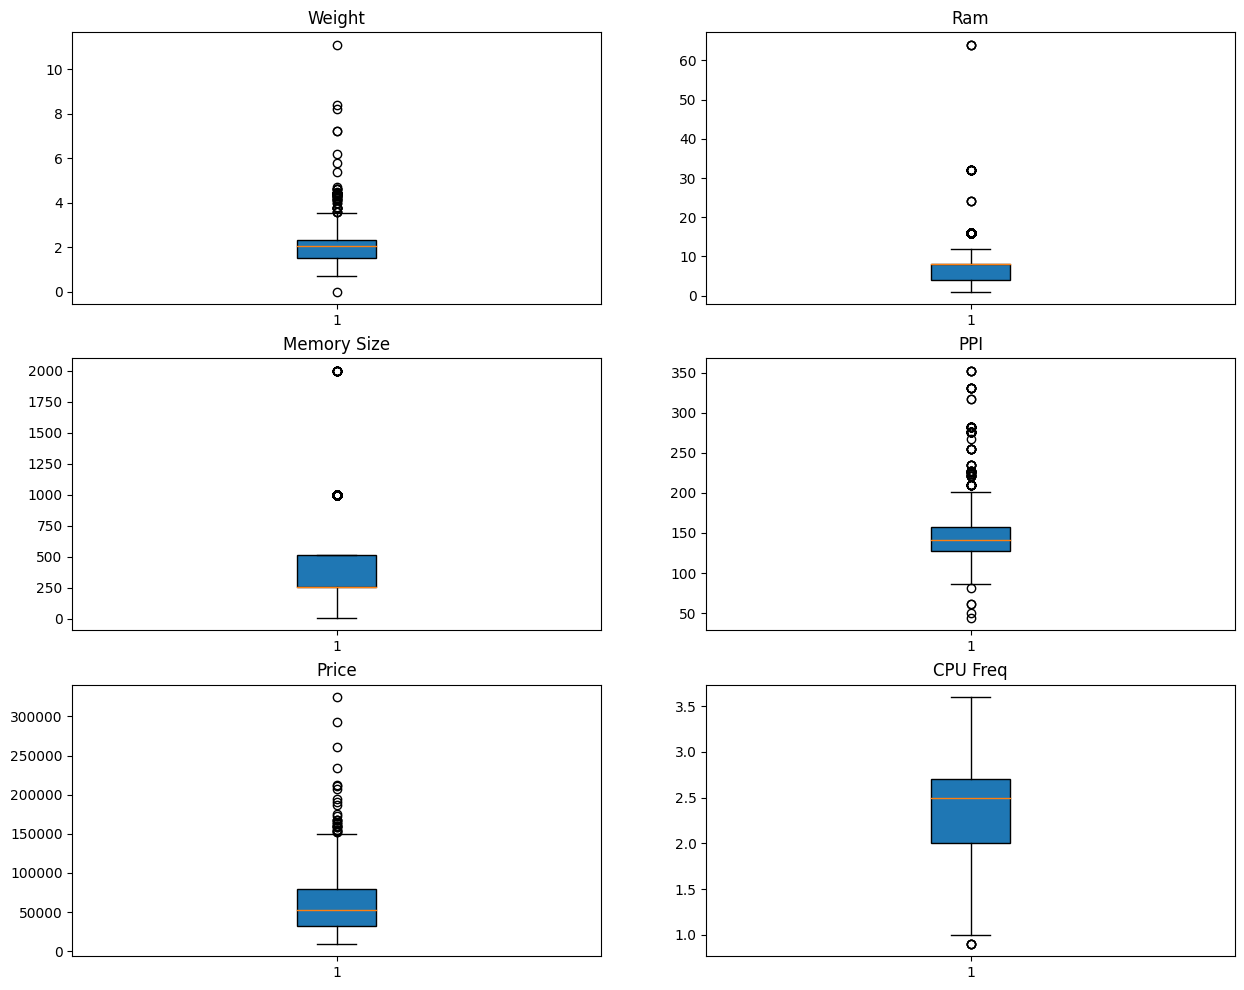

In [147]:
#Weight
plt.figure(figsize=(15,12))

plt.subplot(3,2,1)
plt.title("Weight")
plt.boxplot(df["Weight"].dropna(),patch_artist=True)

plt.subplot(3,2,2)
plt.title("Ram")
plt.boxplot(df["Ram"].dropna(),patch_artist=True)

plt.subplot(3,2,3)
plt.title("Memory Size")
plt.boxplot(df["Memory Size"].dropna(),patch_artist=True)

plt.subplot(3,2,4)
plt.title("PPI")
plt.boxplot(df["PPI"].dropna(),patch_artist=True)

plt.subplot(3,2,5)
plt.title("Price")
plt.boxplot(df["Price"].dropna(),patch_artist=True)

plt.subplot(3,2,6)
plt.title("CPU Freq")
plt.boxplot(df["CPU Freq"].dropna(),patch_artist=True)

# **CHECK NULL VALUES**

In [148]:
df.isna().sum()

Company        0
TypeName       0
Ram            0
OpSys          0
Weight         1
Price          0
Memory Size    1
Memory Type    1
IPS            0
TouchScreen    0
PPI            1
CPU Brand      0
CPU Freq       0
GPU Brand      0
dtype: int64

In [149]:
df.dropna(inplace=True)

In [150]:
df.isna().sum()

Company        0
TypeName       0
Ram            0
OpSys          0
Weight         0
Price          0
Memory Size    0
Memory Type    0
IPS            0
TouchScreen    0
PPI            0
CPU Brand      0
CPU Freq       0
GPU Brand      0
dtype: int64

In [151]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Memory Size,Memory Type,IPS,TouchScreen,PPI,CPU Brand,CPU Freq,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,128.0,SSD,1,0,226.983005,Intel Core i5,2.3,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,128.0,Flash,0,0,127.677940,Intel Core i5,1.8,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,256.0,SSD,0,0,141.211998,Intel Core i5,2.5,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,512.0,SSD,1,0,220.534624,Intel Core i7,2.7,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,256.0,SSD,1,0,226.983005,Intel Core i5,3.1,Intel


# **CORELATION MATRIX**

<Axes: >

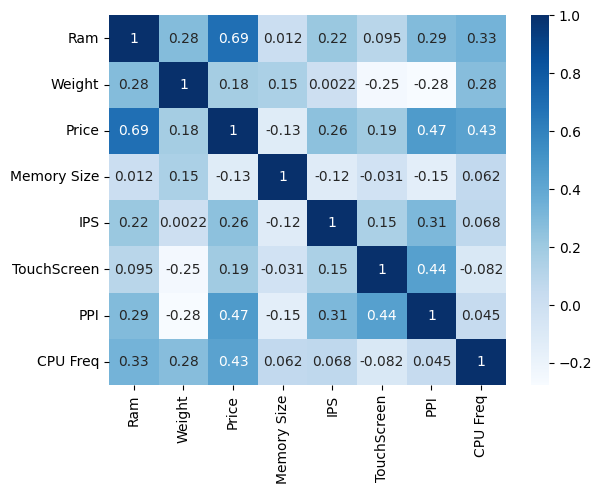

In [152]:
c=df.corr(numeric_only=True)
sns.heatmap(c,cmap="Blues",annot=True)

Text(0.5, 1.0, 'Correlation with Price')

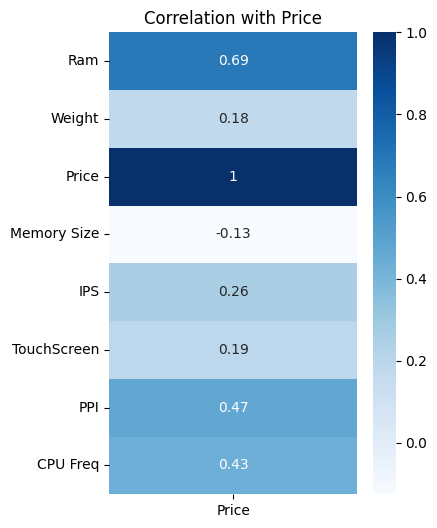

In [153]:
price_corr = df.corr(numeric_only=True)["Price"].to_frame()  # Convert Series to DataFrame

plt.figure(figsize=(4,6))
sns.heatmap(price_corr, cmap="Blues", annot=True)
plt.title("Correlation with Price")

# **DEALING WITH CATEGORICAL DATA**

In [154]:
#Creating new Dataframe
df2=pd.DataFrame([])

In [155]:
import pandas as pd

# Creating a new DataFrame
df2 = pd.DataFrame()

# Creating dummy variables for categorical data
df2 = pd.concat([df2, pd.get_dummies(df["Company"])], axis=1)
df2 = pd.concat([df2, pd.get_dummies(df["TypeName"])], axis=1)
df2 = pd.concat([df2, pd.get_dummies(df["OpSys"])], axis=1)
df2 = pd.concat([df2, pd.get_dummies(df["Memory Type"])], axis=1)
df2 = pd.concat([df2, pd.get_dummies(df["CPU Brand"])], axis=1)
df2 = pd.concat([df2, pd.get_dummies(df["GPU Brand"])], axis=1)

In [156]:
df2["Ram"]=df["Ram"]
df2["Weight"]=df["Weight"]
df2["Memory Size"]=df["Memory Size"]
df2["PPI"]=df["PPI"]
df2["CPU Freq"]=df["CPU Freq"]
df2["Price"]=df["Price"]

In [157]:
df2.head()

,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,...,AMD,ARM,Intel,Nvidia,Ram,Weight,Memory Size,PPI,CPU Freq,Price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,8,1.37,128.0,226.983005,2.3,71378.6832
1,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,8,1.34,128.0,127.677940,1.8,47895.5232
2,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,8,1.86,256.0,141.211998,2.5,30636.0000
3,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,16,1.83,512.0,220.534624,2.7,135195.3360
4,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,8,1.37,256.0,226.983005,3.1,96095.8080


# **MODEL BUILDING**

In [158]:
X=df2.drop("Price",axis=1)
Y=df2["Price"]

# **SPLITTING THE DATASET**

In [159]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

# **1) LINEAR REGRESSION**

In [160]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression()

# **PREDICTION**

In [161]:
y_pred=model1.predict(X_test)

# **EVALUATION**

In [162]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,y_pred)
print(r2)

0.7620326292721312


# **2) Random Forest Regression**

In [163]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators=100,random_state=0)

In [164]:
model2.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

In [165]:
y_pred=model2.predict(X_test)

In [166]:
r2=r2_score(Y_test,y_pred)
print(r2)

0.8539412158727552
